# Analyzing Classified Article Data

In this notebook, we will analyze the data obtained from the previous classification step. The classification categorized article abstracts into operational, tactical, and strategic categories using the OpenAI GPT-4o-mini model. We will use tables and graphics to illustrate the research results.

In [2]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Classified Data
We will start by loading the classified data from the multiple .csv files created in the previous step. This data includes the original article information along with the classification labels.


In [3]:
def list_files_openai(folder):
    df_all = pd.DataFrame()
    try:
        files = os.listdir(folder)
        for file in files:
            path = os.path.join(folder, file)            
            df = pd.read_csv(path)
            df_all = pd.concat([df_all,df])            
    except Exception as e:
        print(f"Err: {e}")
    return df_all

# Exemplo de uso:
folder_target = 'data/articles/openai'
df_all = list_files_openai(folder_target)
print(f'Número de Artigos Classificados: {len(df_all)}')
df_all.head()

Número de Artigos Classificados: 2174


,Abstract,Authors,Classification,DOI,Keywords,Not Identified,Not identified,Operational,Out of Scope,Publisher,Reasons,Source,Strategic,Tactical,Title,Year
0,Marketing and consumer research use a variety ...,Hornik J.; Ofir C.; Rachamim M.,Strategic,10.1007/s11301-024-00441-0,Artificial intelligence (AI); Digital marketin...,5.0,NaN,10,5,Springer Nature,The abstract discusses the implications of IoT...,scopus-ai,60,20,Out of the fog: fog computing-enabled AI to su...,2024
1,Companies neither fully exploit the potential ...,Volkmar G.; Fischer P.M.; Reinecke S.,Strategic,10.1016/j.jbusres.2022.04.007,Artificial Intelligence; Decision- Making; Del...,5.0,NaN,10,0,Elsevier Inc.,The abstract discusses the broader implication...,scopus-ai,60,25,Artificial Intelligence and Machine Learning: ...,2022
2,An efficient store layout presents merchandise...,Nguyen K.; Le M.; Martin B.; Cil I.; Fookes C.,Tactical,10.1007/s10462-022-10142-3,Business intelligence; CCTV visual intelligenc...,5.0,NaN,15,0,Springer Nature,The abstract discusses AI techniques applied t...,scopus-ai,20,60,When AI meets store layout design: a review,2022
3,Despite offering substantial opportunities to ...,Hermann E.; Williams G.Y.; Puntoni S.,Strategic,10.1007/s11747-023-00986-8,Artificial intelligence; Ethics; Justice; Serv...,5.0,NaN,10,5,Springer,The abstract discusses the long-term implicati...,scopus-ai,60,20,Deploying artificial intelligence in services ...,2023
4,Introduction – Current study examines the rela...,Sabharwal D.; Sood R.S.; Verma M.,Strategic,10.31620/JCCC.12.22/10,Artificial intelligence; Communication technol...,5.0,NaN,10,0,Amity University,The abstract discusses the relationship betwee...,scopus-ai,60,25,Studying the Relationship between Artificial I...,2022


In [4]:
# Values change 'Not Identified' to 'Not identified'
df_all['Classification'] = df_all['Classification'].replace('Not Identified', 'Not identified')
df_all['Classification'].value_counts()

Classification
Tactical          1122
Strategic          789
Out of scope       120
Not identified      74
Operational         69
Name: count, dtype: int64

## Grouped and saved data
We classified data is saved in grouped .csv will be used for detailed analysis in subsequent our research.

In [5]:
df_all.to_csv('data/article_classification_gpt4o-mini.csv', index=False)

In [6]:
for classification in df_all['Classification'].unique():    
    df_all[df_all['Classification'] == classification].to_csv(f'data/article_classification_gpt4o-mini_{classification}.csv', index=False)

## Load data from a control point

In [7]:
df_all = pd.read_csv('data/article_classification_gpt4o-mini.csv')
df_all['Year'] = pd.to_numeric(df_all['Year'], errors='coerce')

## Classification Analysis

In [8]:
df_all = df_all[df_all['Classification'].isin(['Strategic', 'Tactical', 'Operational'])]
df_all['Classification'].value_counts()

Classification
Tactical       1122
Strategic       789
Operational      69
Name: count, dtype: int64

In [9]:
# df_all = df_all[df_all['Year']>=1990]
# df_all['Classification'].value_counts()

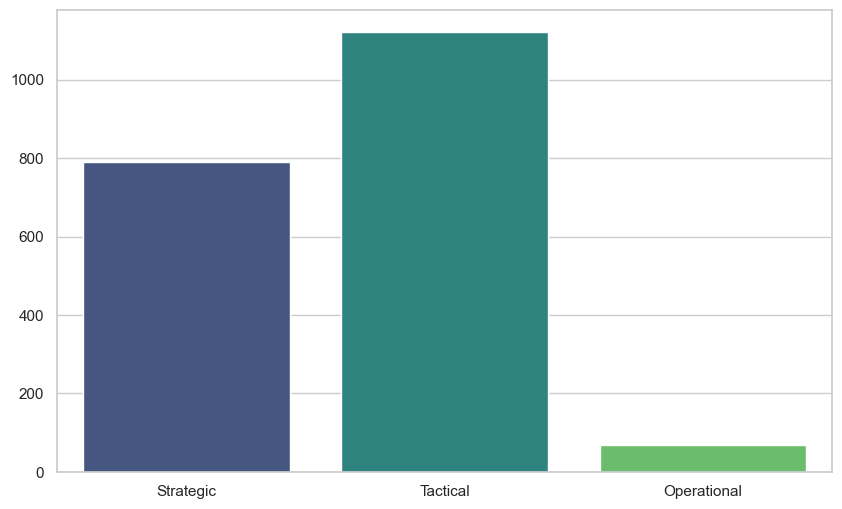

In [16]:


# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Gráfico de barras para Classificação dos Artigos
plt.figure(figsize=(10, 6))
sns.countplot(data=df_all, x='Classification', palette='viridis')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

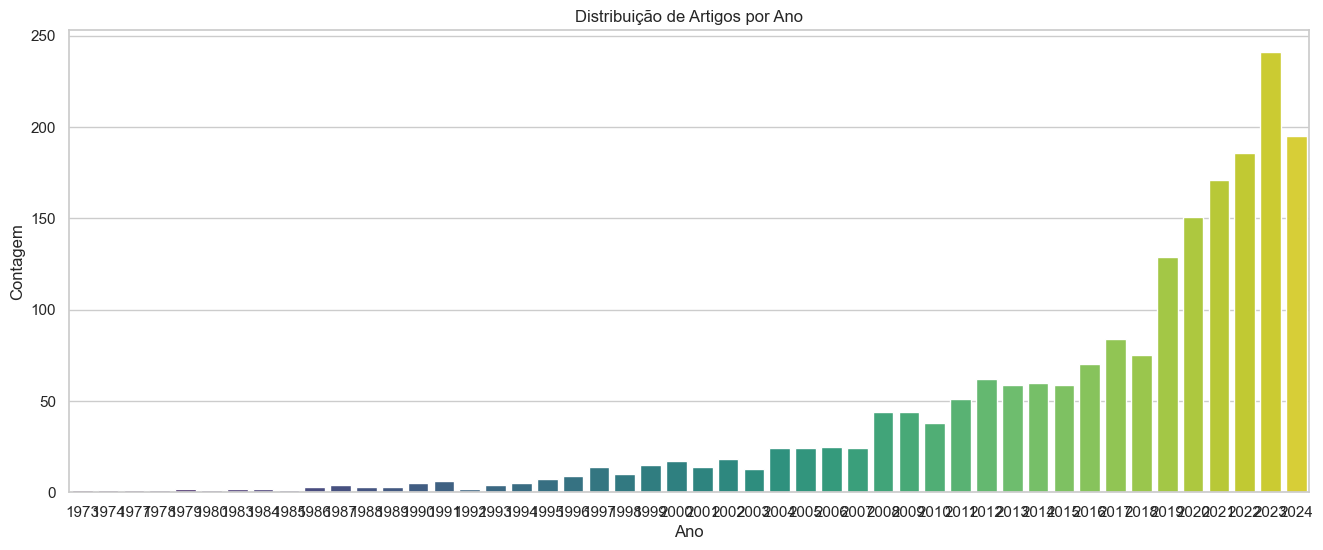

In [11]:
# Gráfico de barras para Distribuição de Artigos por Ano
plt.figure(figsize=(16, 6))
sns.countplot(data=df_all, x='Year', palette='viridis')
plt.title('Distribuição de Artigos por Ano')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.show()

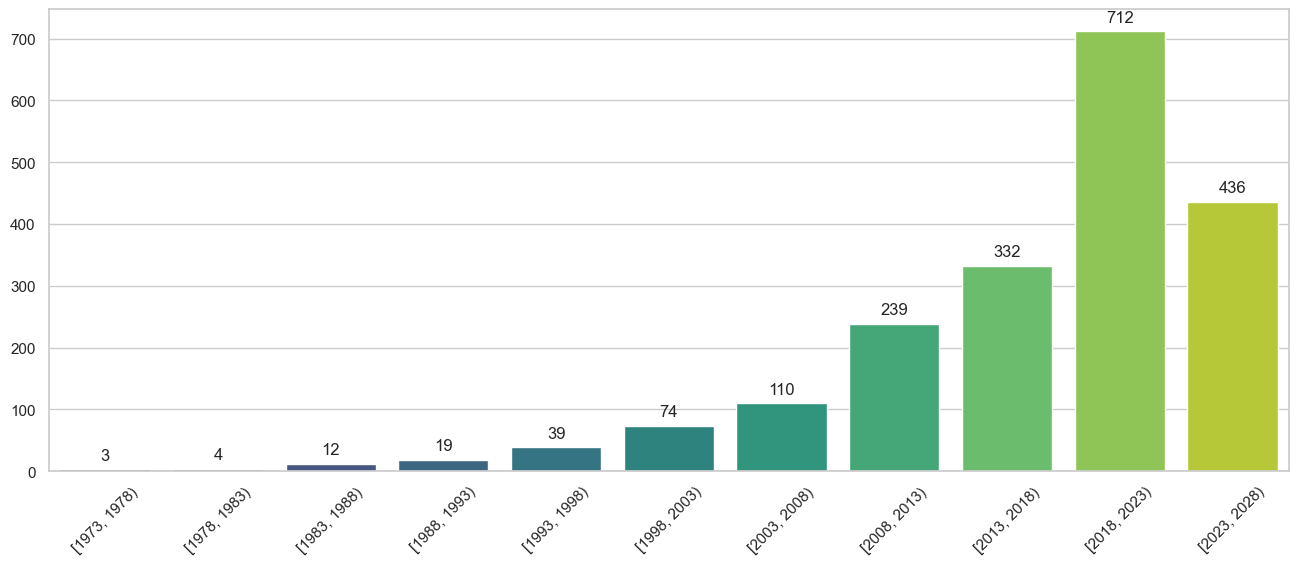

In [21]:
import numpy as np

# Agrupando os anos em intervalos de 5
df_all['Year_Group'] = pd.cut(df_all['Year'], bins=np.arange(df_all['Year'].min(), df_all['Year'].max() + 5, 5), right=False)

# Gráfico de barras para Distribuição de Artigos por Intervalo de Ano
plt.figure(figsize=(16, 6))
ax = sns.countplot(data=df_all, x='Year_Group', palette='viridis')
plt.title('')
plt.xlabel('')
plt.xticks(rotation=45)  # Rotação dos labels para melhor visualização
plt.ylabel('')

# Adicionando as contagens acima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


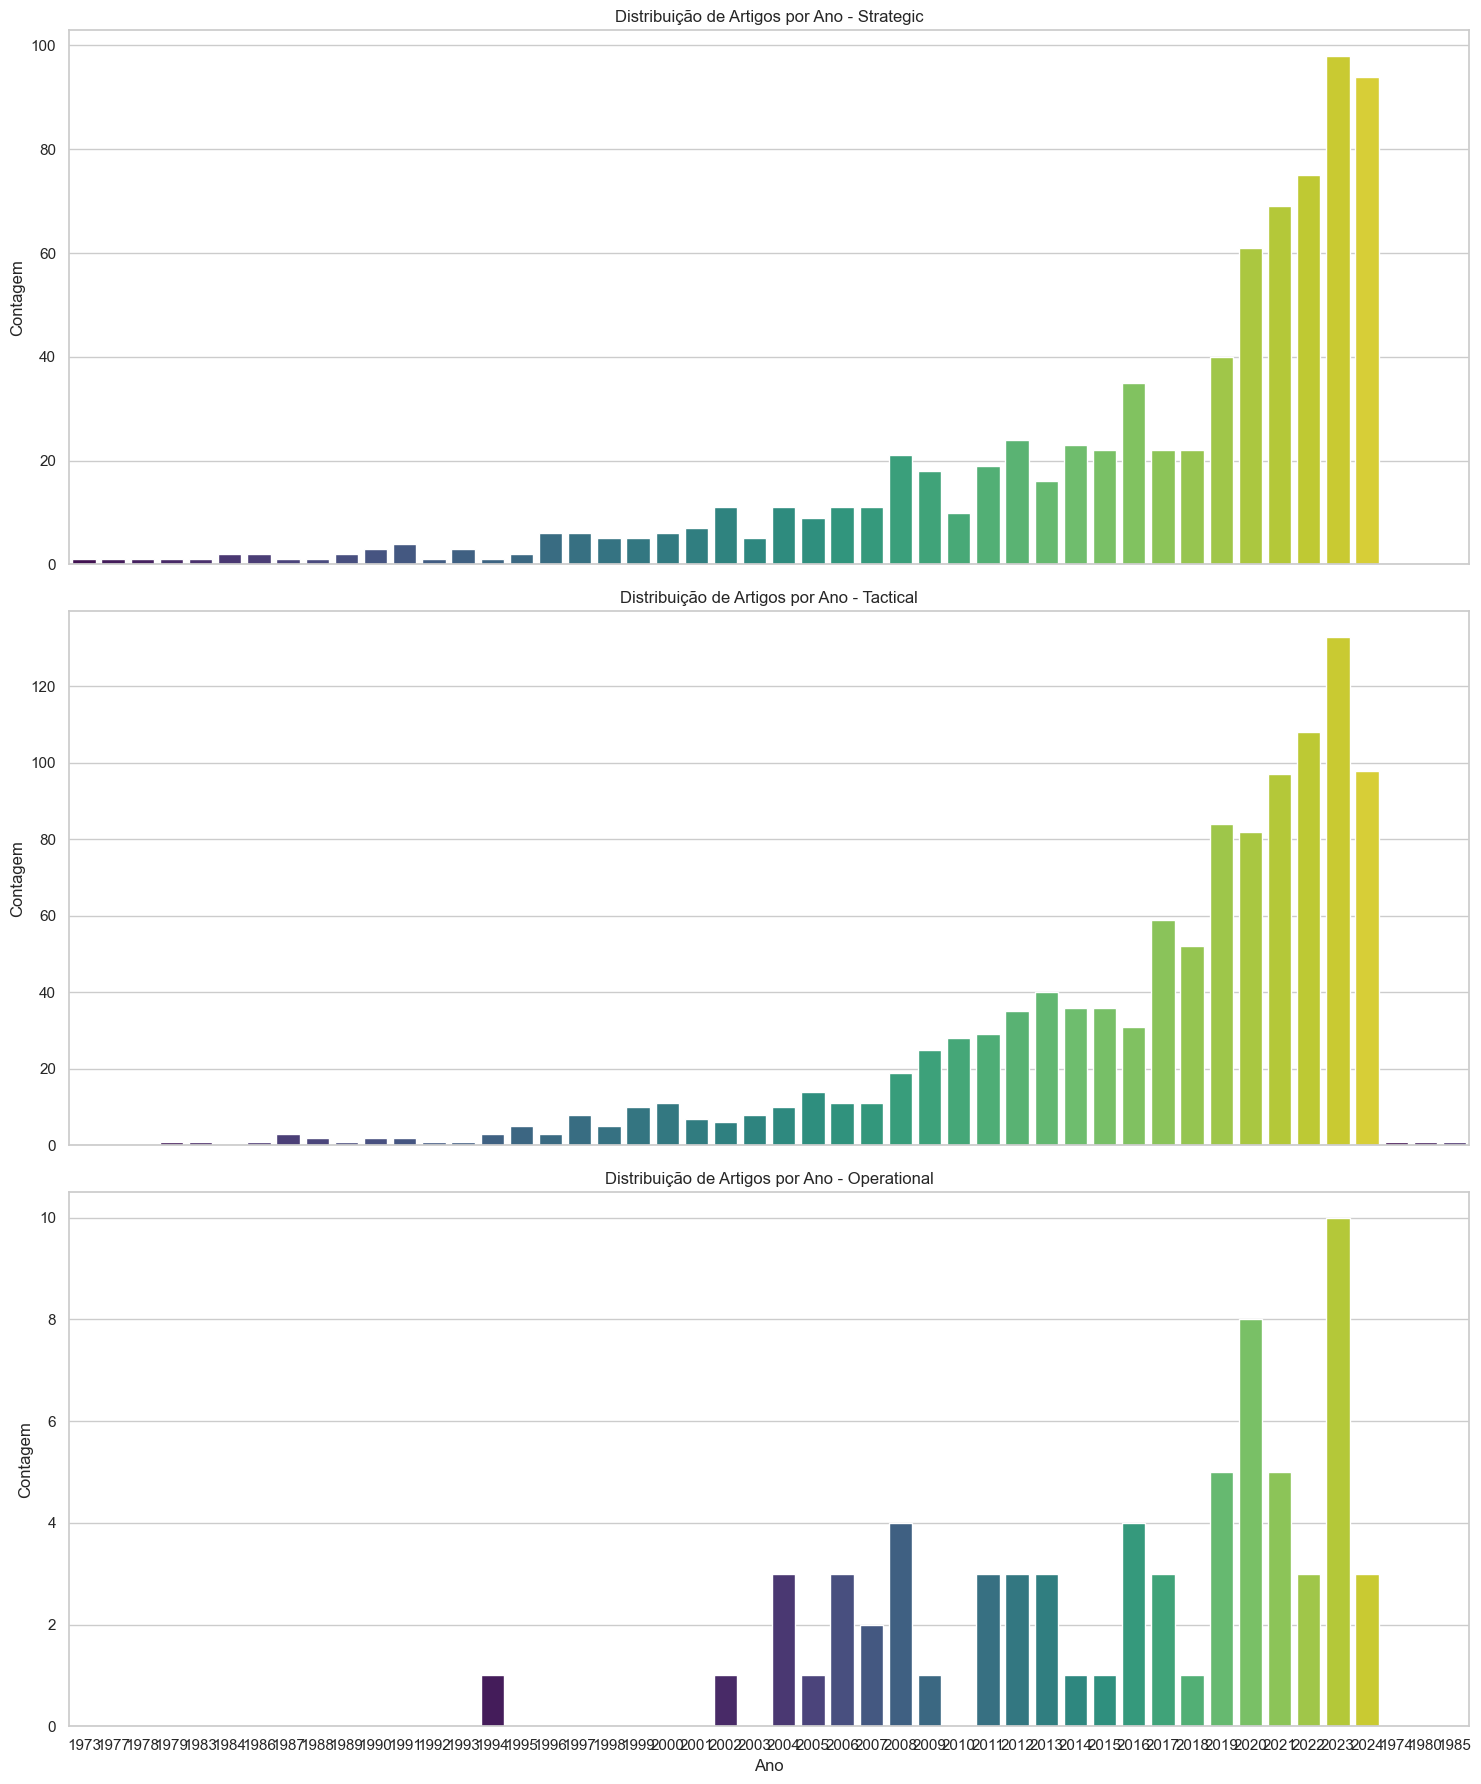

In [13]:
# Identificar as classificações únicas
classifications = df_all['Classification'].unique()

# Criar a figura e os eixos para os subplots com base no número de classificações
fig, axs = plt.subplots(len(classifications), 1, figsize=(15, 6 * len(classifications)), sharex=True)

# Iterar sobre as classificações únicas e criar um gráfico para cada uma
for i, classification in enumerate(classifications):
    sns.countplot(data=df_all[df_all['Classification'] == classification], x='Year', palette='viridis', ax=axs[i])
    axs[i].set_title(f'Distribuição de Artigos por Ano - {classification}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Contagem')

# Ajustar o último gráfico para ter o rótulo do eixo x
axs[-1].set_xlabel('Ano')

# Ajustar o layout
plt.tight_layout()
plt.show()


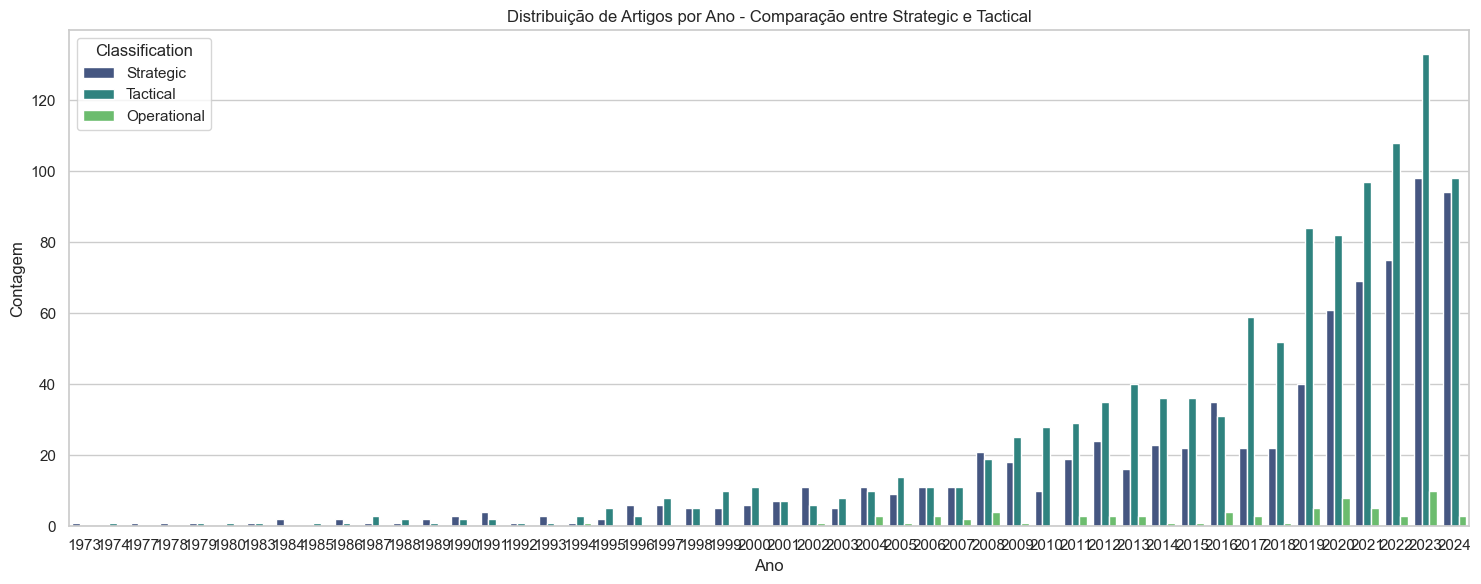

In [14]:
df_strategic_tactial = df_all[df_all['Classification'].isin(['Strategic', 'Tactical','Operational'])]
# Criar a figura e os eixos para os subplots
fig, axs = plt.subplots(1, 1, figsize=(15, 6))

# Plotar o gráfico para as classificações
sns.countplot(data=df_strategic_tactial, x='Year', hue='Classification', palette='viridis', ax=axs)
axs.set_title('')
axs.set_xlabel('Year')
axs.set_ylabel('Cont')

# Ajustar o layout
plt.tight_layout()
plt.show()

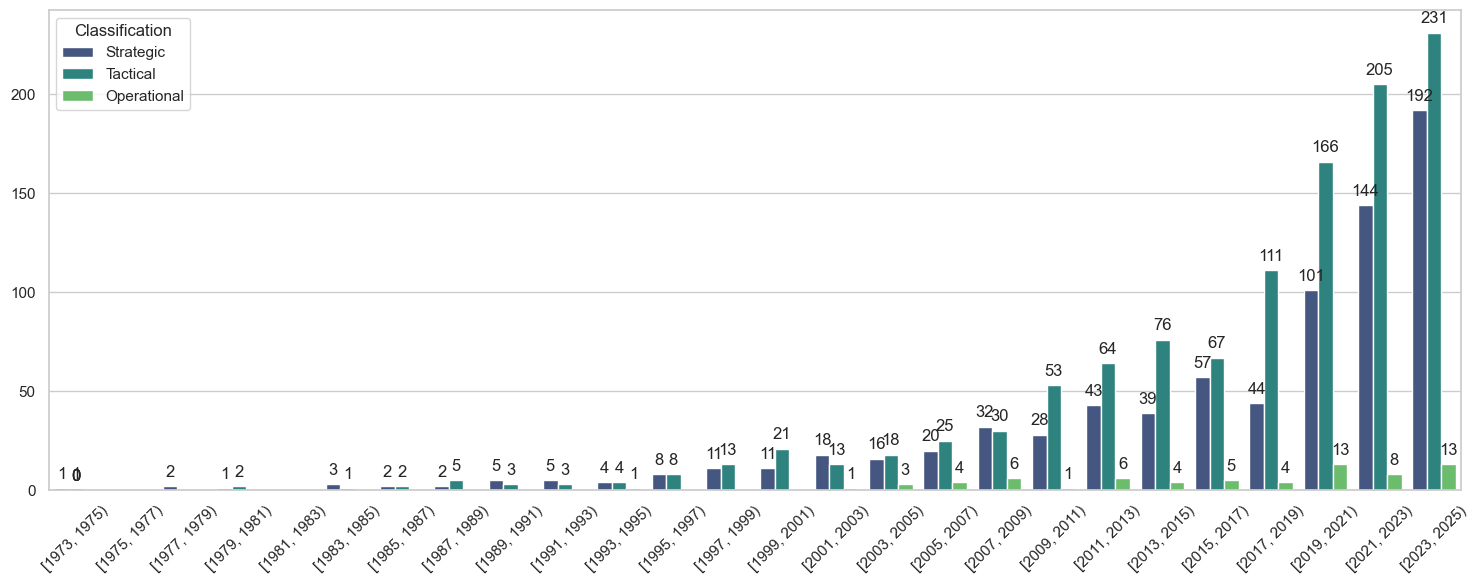

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filtrando os dados para classificações específicas
df_strategic_tactical = df_all[df_all['Classification'].isin(['Strategic', 'Tactical', 'Operational'])]

# Agrupando os anos em intervalos de 5
df_strategic_tactical['Year_Group'] = pd.cut(df_strategic_tactical['Year'], bins=np.arange(df_strategic_tactical['Year'].min(), df_strategic_tactical['Year'].max() + 2, 2), right=False)

# Criar a figura e os eixos para os subplots
fig, axs = plt.subplots(1, 1, figsize=(15, 6))

# Plotar o gráfico para as classificações
ax = sns.countplot(data=df_strategic_tactical, x='Year_Group', hue='Classification', palette='viridis', ax=axs)
axs.set_title('')
axs.set_xlabel('')
axs.set_ylabel('')
plt.xticks(rotation=45)  # Rotação dos labels para melhor visualização

# Adicionando as contagens acima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Ajustar o layout
plt.tight_layout()
plt.show()


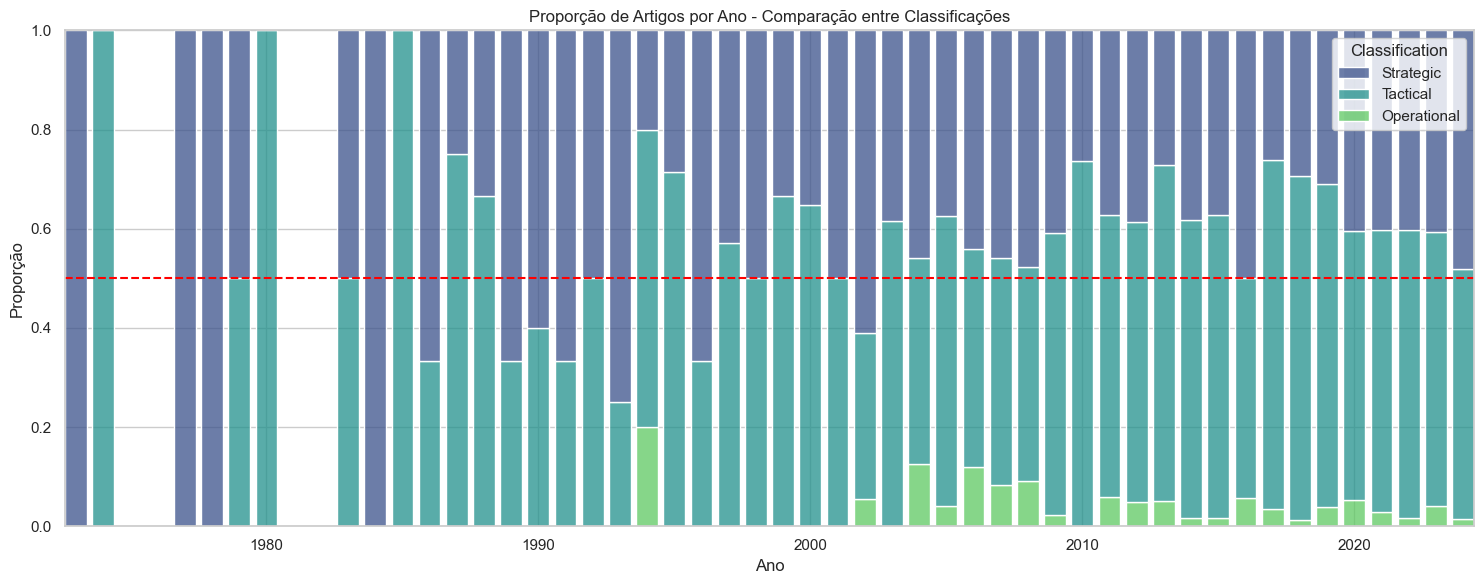

In [15]:
# Criar a figura e os eixos para os subplots
fig, axs = plt.subplots(1, 1, figsize=(15, 6))

# Plotar o gráfico de proporção para as classificações
sns.histplot(data=df_strategic_tactial, x='Year', hue='Classification', multiple='fill', palette='viridis', shrink=.8, discrete=True, ax=axs)
axs.axhline(0.5, color='red', linestyle='--')  # Adicionar a linha vermelha em 0.5
axs.set_title('Proporção de Artigos por Ano - Comparação entre Classificações')
axs.set_xlabel('Ano')
axs.set_ylabel('Proporção')

# Ajustar o layout
plt.tight_layout()
plt.show()
